In [1]:
import pandas as pd

dados = pd.read_csv('creditcard.csv')
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
dados.isna().sum().sum()

0

In [3]:
dados.shape

(284807, 31)

In [4]:
dados['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
n_transacoes = dados['Class'].count()
n_fraudes = dados['Class'].sum()
n_normais = n_transacoes - n_fraudes
fraudes_porc = n_fraudes / n_transacoes
normais_porc = n_normais / n_transacoes

print("Número de transações: ", n_transacoes)
print("Número de fraudes: ", n_fraudes, "%.2f" %(fraudes_porc*100))
print("Número de transações normais: ", n_normais, "%.2f" %(normais_porc*100))

Número de transações:  284807
Número de fraudes:  492 0.17
Número de transações normais:  284315 99.83


In [6]:
x = dados.drop(columns='Class').values
y = dados['Class'].values

In [7]:
from  sklearn.model_selection import StratifiedShuffleSplit

validador = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for treino_id, teste_id in validador.split(x,y):
    x_train, x_test = x[treino_id], x[teste_id]
    y_train, y_test = y[treino_id], y[teste_id]

In [8]:
from sklearn import tree

classificador = tree.DecisionTreeClassifier()
arvore = classificador.fit(x_train,y_train)
y_pred = arvore.predict(x_test)

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

def validador(X, y):
  validador = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
  for treino_id, teste_id in validador.split(X, y):
    X_train, X_test = X[treino_id], X[teste_id]
    y_train, y_test = y[treino_id], y[teste_id]
  return X_train, X_test, y_train, y_test

In [10]:
from sklearn import tree

def executar_classificador(classificador, X_train, X_test, y_train):
  arvore = classificador.fit(X_train, y_train)
  y_pred = arvore.predict(X_test)
  return y_pred

In [11]:
x = dados.drop(columns='Class').values
y = dados['Class'].values
X_train, X_test, y_train, y_test = validador(x, y)

classificador_arvore_decisao = tree.DecisionTreeClassifier()
y_pred_arvore_decisao = executar_classificador(classificador_arvore_decisao, X_train, X_test, y_train)

In [12]:
import matplotlib.pyplot as plt

def salvar_arvore(classificador, nome):
  plt.figure(figsize=(200,100))
  tree.plot_tree(classificador, filled=True, fontsize=14)
  plt.savefig(nome)
  plt.close()

In [13]:
#criacao da figura da arvore de decisao
salvar_arvore(classificador_arvore_decisao, "arvore_decisao1.png")

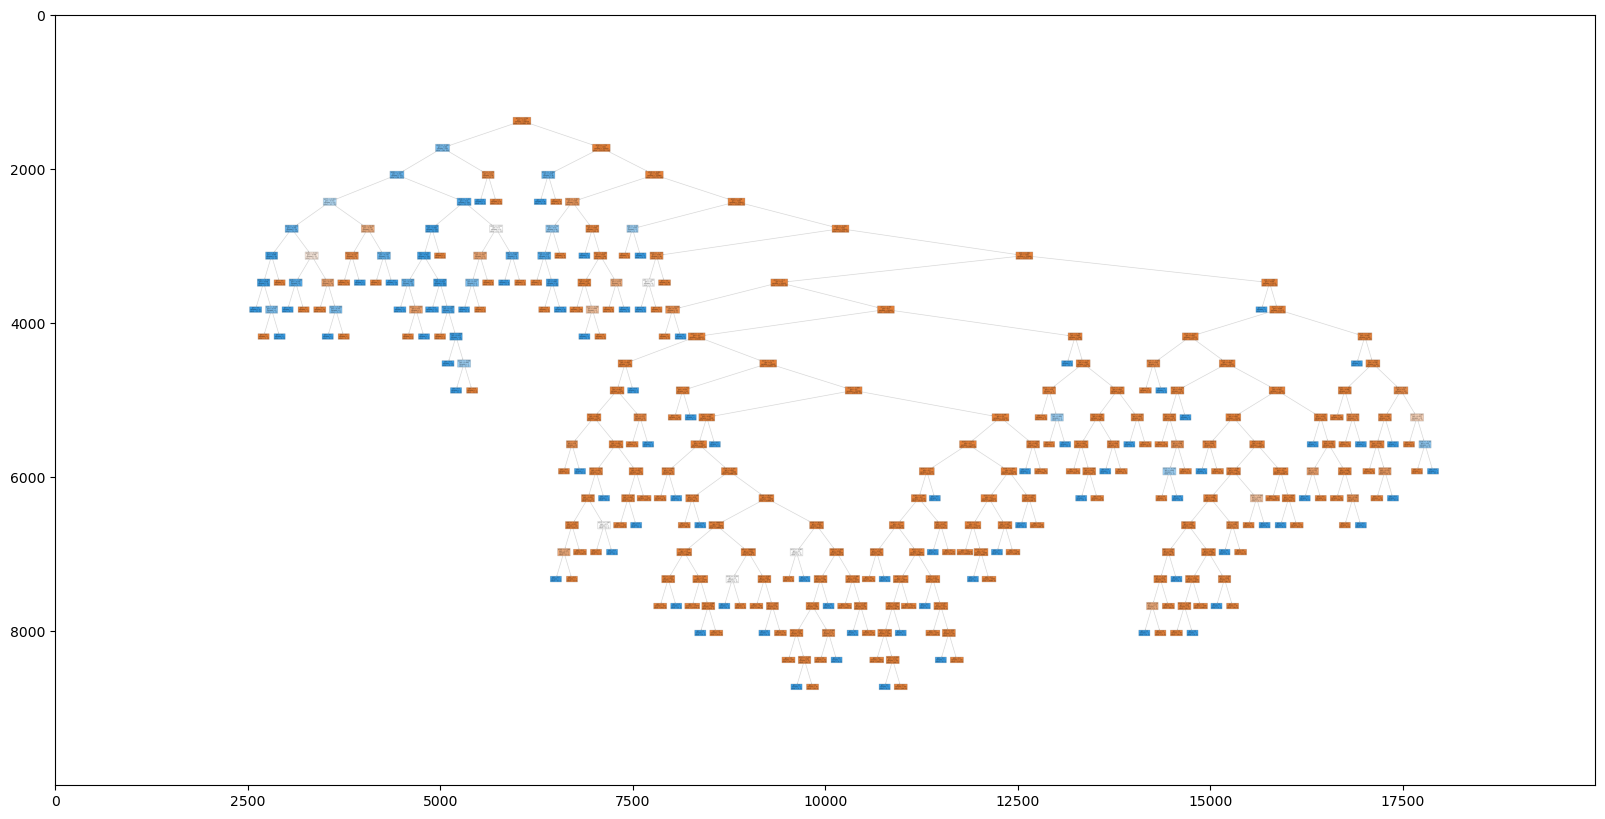

In [14]:
import matplotlib.image as img

image = img.imread('arvore_decisao1.png')
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

In [15]:
from sklearn.metrics import accuracy_score

def validar_arvore(y_pred, y_test):
  print(accuracy_score(y_pred, y_test))

In [16]:
#validacao arvore de decisao
validar_arvore(y_pred_arvore_decisao, y_test)

0.9990519995786665


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def validar_arvore(y_test, y_pred):
  print(f'Acurácia:  {accuracy_score(y_test, y_pred)}')
  print(f'Precisão: {precision_score(y_test, y_pred)}')
  print(f'Recall: {recall_score(y_test, y_pred)}')
  print(confusion_matrix(y_test, y_pred))

In [18]:
validar_arvore(y_test, y_pred_arvore_decisao)

Acurácia:  0.9990519995786665
Precisão: 0.7391304347826086
Recall: 0.6938775510204082
[[28420    12]
 [   15    34]]


In [19]:
classificador_arvore_decisao = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
y_pred_arvore_decisao = executar_classificador(classificador_arvore_decisao, x_train, x_test, y_train)

In [20]:
validar_arvore(y_test,y_pred_arvore_decisao)

Acurácia:  0.999403110845827
Precisão: 0.9210526315789473
Recall: 0.7142857142857143
[[28429     3]
 [   14    35]]


In [21]:
%%time
from sklearn.ensemble import RandomForestClassifier

classificador_random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
y_pred_random_forest = executar_classificador(classificador_random_forest, X_train, X_test, y_train)

CPU times: total: 3min 53s
Wall time: 4min 4s


In [22]:
salvar_arvore(classificador_random_forest.estimators_[0], "random_forest1")
salvar_arvore(classificador_random_forest.estimators_[1], "random_forest2")

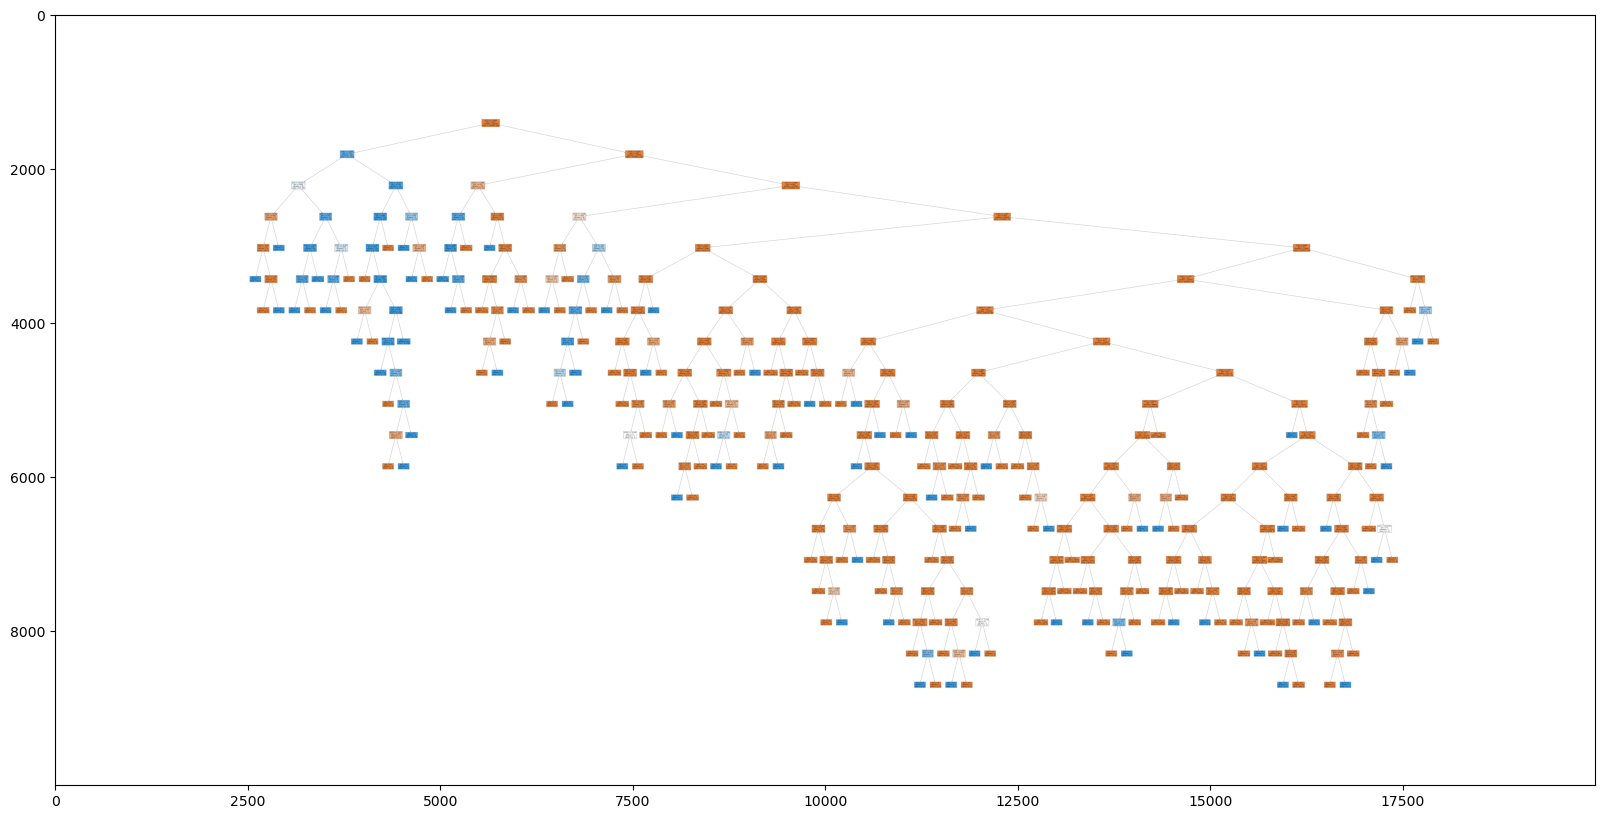

In [25]:
image = img.imread('random_forest1.png')
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

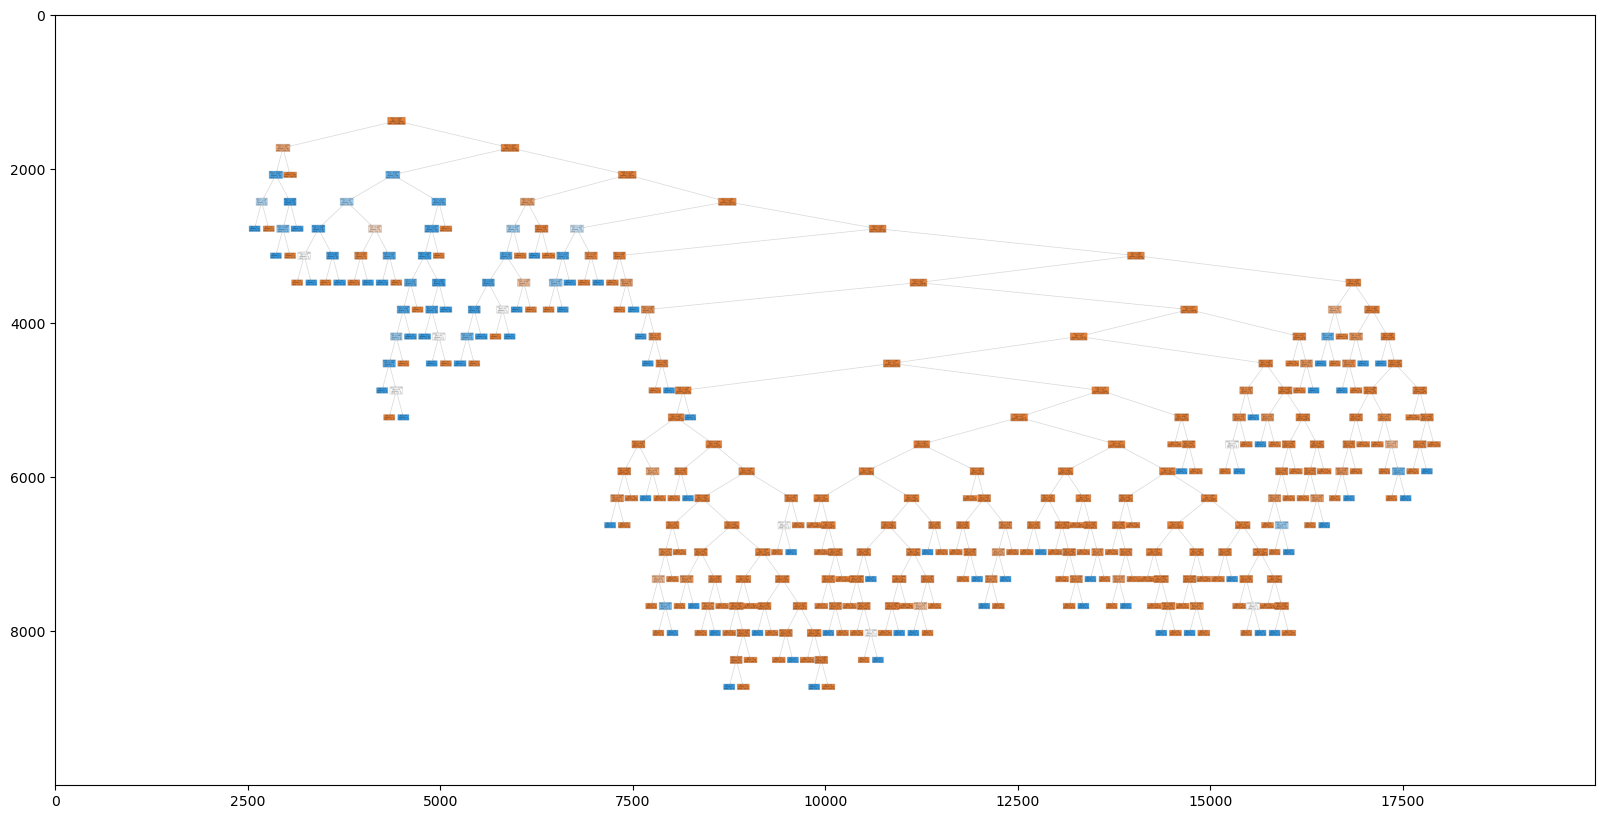

In [26]:
image = img.imread('random_forest2.png')
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

In [23]:
%%time
from sklearn.ensemble import RandomForestClassifier

classificador_random_forest = RandomForestClassifier(n_estimators=50, random_state=0, max_depth=10)
y_pred_random_forest = executar_classificador(classificador_random_forest, X_train, X_test, y_train)

CPU times: total: 1min 11s
Wall time: 1min 15s


In [24]:
validar_arvore(y_test, y_pred_random_forest)

Acurácia:  0.9995435553526912
Precisão: 0.9736842105263158
Recall: 0.7551020408163265
[[28431     1]
 [   12    37]]


In [29]:
from sklearn.ensemble import AdaBoostClassifier

classificador_adaboost = AdaBoostClassifier(random_state=0)
y_pred_adaboost = executar_classificador(classificador_adaboost, x_train, x_test, y_train)

In [30]:
salvar_arvore(classificador_adaboost.estimators_[0], "adaboost1")
salvar_arvore(classificador_adaboost.estimators_[1], "adaboost2")

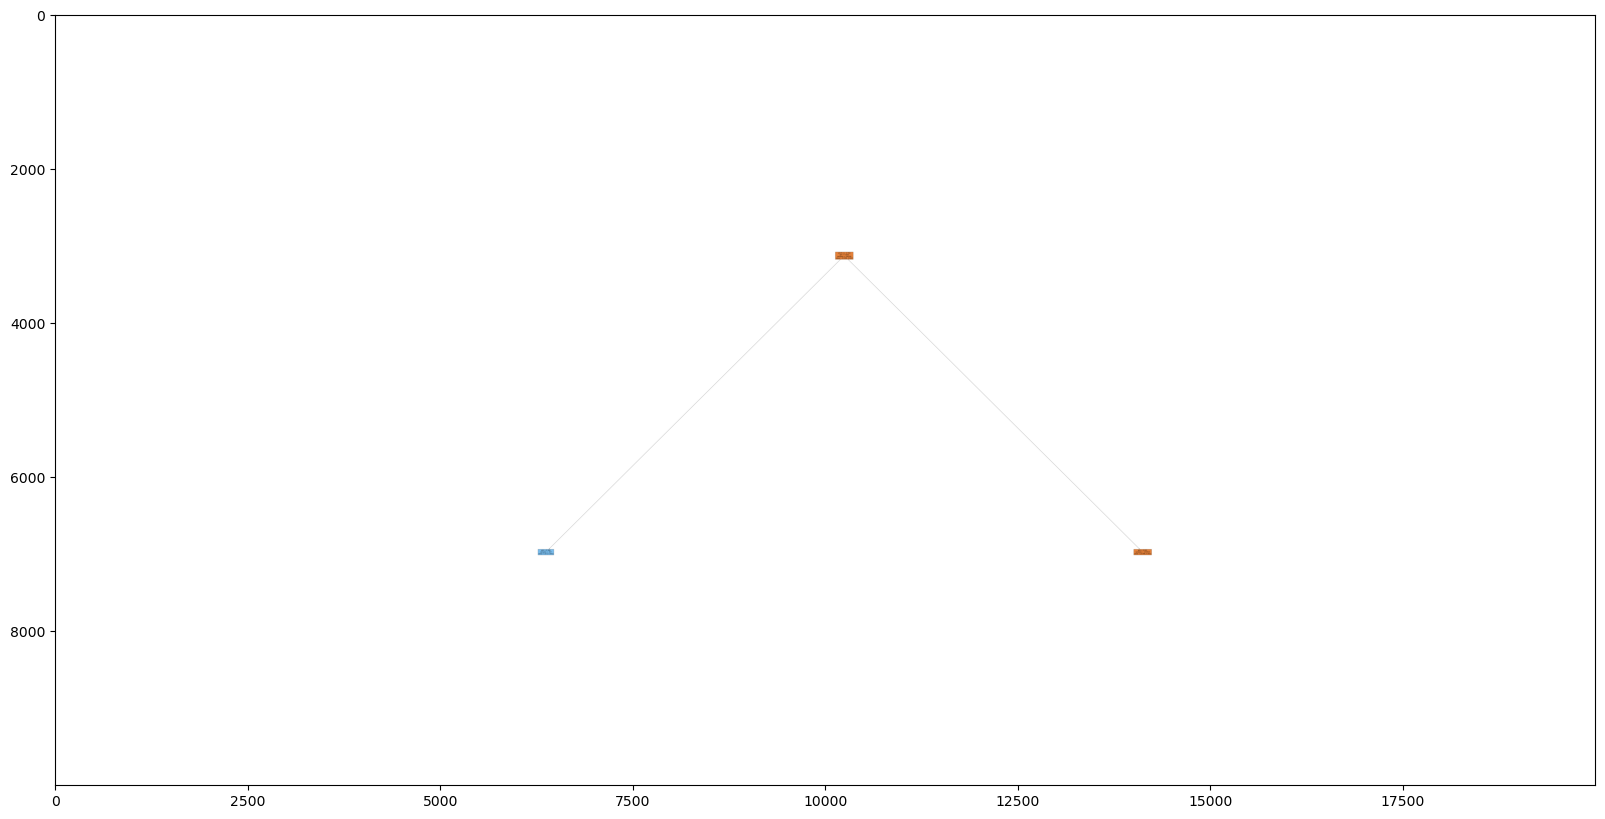

In [32]:
image = img.imread('adaboost1.png')
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

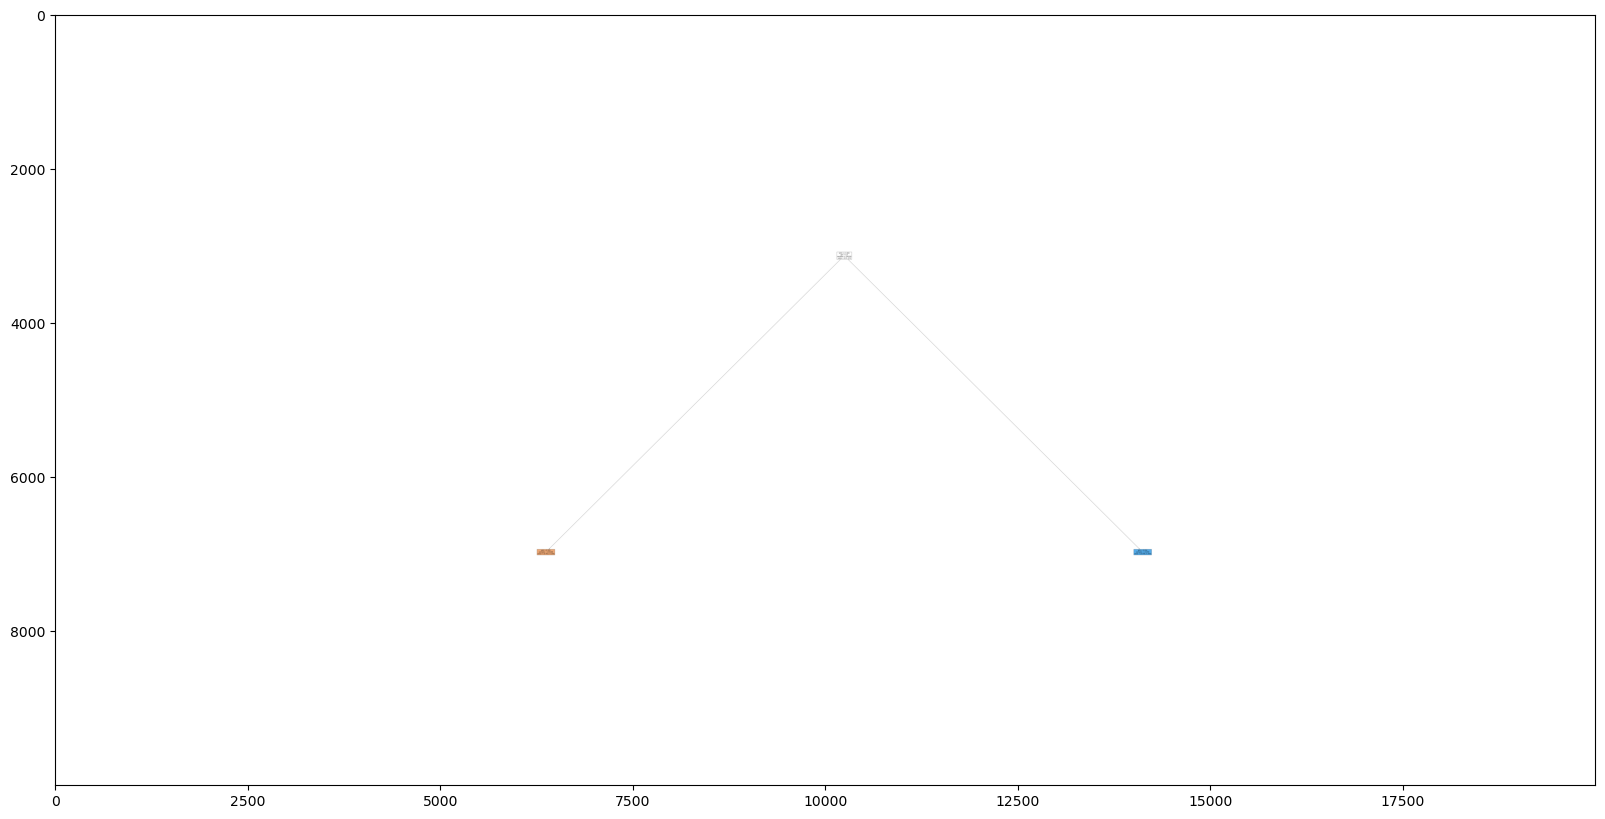

In [31]:
image = img.imread('adaboost2.png')
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

In [33]:
validar_arvore(y_test, y_pred_adaboost)

Acurácia:  0.9992626663389628
Precisão: 0.8888888888888888
Recall: 0.6530612244897959
[[28428     4]
 [   17    32]]


In [35]:
%%time


classificador_adaboost = AdaBoostClassifier(random_state=0, n_estimators=100)
y_pred_adaboost = executar_classificador(classificador_adaboost, x_train, x_test, y_train)

CPU times: total: 2min 14s
Wall time: 2min 18s


In [36]:
validar_arvore(y_test, y_pred_adaboost)

Acurácia:  0.999403110845827
Precisão: 0.8636363636363636
Recall: 0.7755102040816326
[[28426     6]
 [   11    38]]
